In [2]:
import pandas as pd

Data read : "wine.csv"

In [3]:
wine = pd.read_csv('data/wine.csv')
print(wine)

     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0 

Data selection : excep for "Class label 1"

In [5]:
df_wine = wine[wine['Class label'] != 1]
print(df_wine)

     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
59             2    12.37        0.94  1.36               10.6         88   
60             2    12.33        1.10  2.28               16.0        101   
61             2    12.64        1.36  2.02               16.8        100   
62             2    13.67        1.25  1.92               18.0         94   
63             2    12.37        1.13  2.16               19.0         87   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
59

Feature select : two features(Alcohol and Hue) of Wine classes 2 and 3

In [8]:
X = df_wine[['Alcohol', 'Ash']].values
y = df_wine['Class label'].values

Next, we encode the class labels into binary format

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


spilt the dataset : 70% OOB and 30% test set

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)
print('X_train \n', X_train)
print('y_train \n', y_train)

X_train 
 [[12.    2.42]
 [12.2   2.32]
 [12.29  1.98]
 [12.33  1.95]
 [14.13  2.74]
 [12.16  2.31]
 [12.47  2.2 ]
 [13.4   2.86]
 [12.37  2.1 ]
 [13.11  2.75]
 [12.87  2.48]
 [14.34  2.7 ]
 [12.29  2.21]
 [12.08  2.5 ]
 [11.87  2.39]
 [13.5   2.62]
 [12.08  2.51]
 [12.29  2.22]
 [12.25  2.54]
 [12.96  2.35]
 [12.37  2.16]
 [12.93  2.7 ]
 [11.96  2.3 ]
 [13.48  2.64]
 [12.08  1.7 ]
 [11.46  1.82]
 [12.51  1.98]
 [13.58  2.69]
 [12.52  2.17]
 [12.67  2.24]
 [12.34  2.46]
 [13.05  2.32]
 [12.81  2.4 ]
 [13.52  2.72]
 [12.22  1.94]
 [12.    2.  ]
 [12.04  2.38]
 [13.67  1.92]
 [13.73  2.26]
 [12.08  2.3 ]
 [13.4   2.48]
 [12.25  2.12]
 [13.32  2.38]
 [12.37  1.92]
 [12.    2.  ]
 [12.37  1.36]
 [12.82  2.3 ]
 [11.82  1.99]
 [12.72  2.2 ]
 [11.45  2.42]
 [12.42  2.73]
 [13.11  1.7 ]
 [13.71  2.45]
 [13.49  2.24]
 [13.16  2.15]
 [12.79  2.48]
 [13.88  2.23]
 [11.79  2.78]
 [12.85  2.58]
 [12.99  2.6 ]
 [11.64  2.46]
 [11.65  2.62]
 [12.29  2.21]
 [13.62  2.35]
 [11.84  2.23]
 [12.36  2.38]


BaggingClassifier algorithm : scikit-learn Decision Tree : an ensemble of 500 decision trees fitted on different bootstrap samples of the training dataset

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# DT Classifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
# Bagging Classifier
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, max_samples = 1.0,
                       max_features = 1.0, bootstrap = True, bootstrap_features = False, n_jobs = 1, 
                       random_state = 0)

Compare Decision Tree with Bagging Classifier

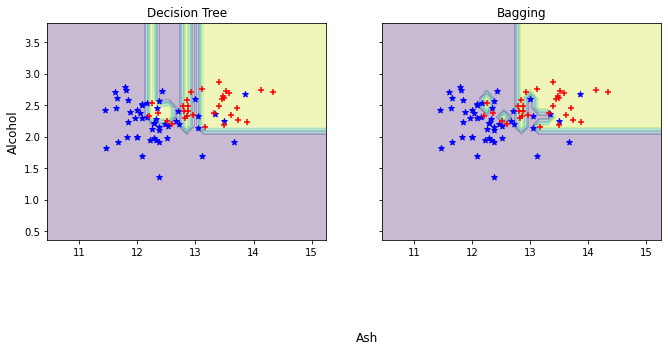

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() -1
x_max = X_train[:, 0].max() +1
y_min = X_train[:, 1].min() -1
y_max = X_train[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.15), np.arange(y_min, y_max, 0.15))
f, axarr = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row', figsize = (11, 4))
for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha = .3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = 'blue', marker = '*')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = 'red', marker = '+')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize = 12)
plt.text(10.2, -1.2, s = 'Ash', ha = 'center', va = 'center', fontsize = 12)
plt.show()

Accuracy score : Decision Tree VS Bagging Classifier

In [17]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_test_pred_tree = tree.predict(X_test)
tree_test = accuracy_score(y_test, y_test_pred_tree)

bag = bag.fit(X_train, y_train)
y_test_pred_bag = bag.predict(X_test)
bag_test = accuracy_score(y_test, y_test_pred_bag)

print('Decision Tree \nAccuracies %.3f' % (tree_test))
print('Bagging \nAccuracies %.3f' % (bag_test))

Decision Tree 
Accuracies 0.639
Bagging 
Accuracies 0.722
